## Use Python to calculate the Sharpe ratio for a portfolio
#### https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805

## Plotting Markowitz Efficient Frontier with Python
#### https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5

In [27]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [28]:
# Ações do Desafio

from pandas_datareader import data as wb
TickerA='LAME4.SA'
TickerB='WEGE3.SA'
TickerC='BRFS3.SA'
TickerD='^BVSP'    #mercado'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC, TickerD]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2012-1-1')['Adj Close']
    
    
lame = prices.drop(columns = ['WEGE3.SA','BRFS3.SA', '^BVSP']).rename(columns={'LAME4.SA': 'Adj. Close'})
weg = prices.drop(columns = ['LAME4.SA','BRFS3.SA', '^BVSP']).rename(columns={'WEGE3.SA': 'Adj. Close'})
brf = prices.drop(columns = ['WEGE3.SA','LAME4.SA', '^BVSP']).rename(columns={'BRFS3.SA': 'Adj. Close'})
    
prices.sort_values(by = ['Date'],ascending=True).head()

,LAME4.SA,WEGE3.SA,BRFS3.SA,^BVSP
Date,,,,
2012-01-02,7.184129,4.082735,33.019550,57829.0
2012-01-03,7.213193,4.179007,33.418934,59265.0
2012-01-04,7.198660,4.200883,33.688293,59365.0
2012-01-05,7.203507,4.227145,33.883343,58546.0
2012-01-06,7.193813,4.179007,33.985516,58600.0


In [29]:
weg.head(3)

,Adj. Close
Date,
2012-01-02,4.082735
2012-01-03,4.179007
2012-01-04,4.200883


In [30]:
weg.head(3)

,Adj. Close
Date,
2012-01-02,4.082735
2012-01-03,4.179007
2012-01-04,4.200883


In [31]:
for stock_df in (lame, weg, brf):
    stock_df['Norm return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']
for stock_df, allocation in zip((lame, weg, brf),[.5,.3,.2]):
    stock_df['Allocation'] = stock_df['Norm return'] * allocation
for stock_df in (lame, weg, brf): 
    stock_df['Position'] = stock_df['Allocation']*10000

all_pos = [lame['Position'], weg['Position'], brf['Position']]

# Evolução do portfolio

portf_val = pd.concat(all_pos, axis=1)
portf_val.columns = ['LAME Pos','WEG Pos','BRF Pos']
portf_val['Total Pos'] = portf_val.sum(axis=1)
portf_val.head()

,LAME Pos,WEG Pos,BRF Pos,Total Pos
Date,,,,
2012-01-02,5000.000000,3000.000000,2000.000000,10000.000000
2012-01-03,5020.228047,3070.740808,2024.190732,10115.159586
2012-01-04,5010.113691,3086.815572,2040.505890,10137.435154
2012-01-05,5013.487134,3106.112438,2052.320060,10171.919632
2012-01-06,5006.740249,3070.740808,2058.508687,10135.989743


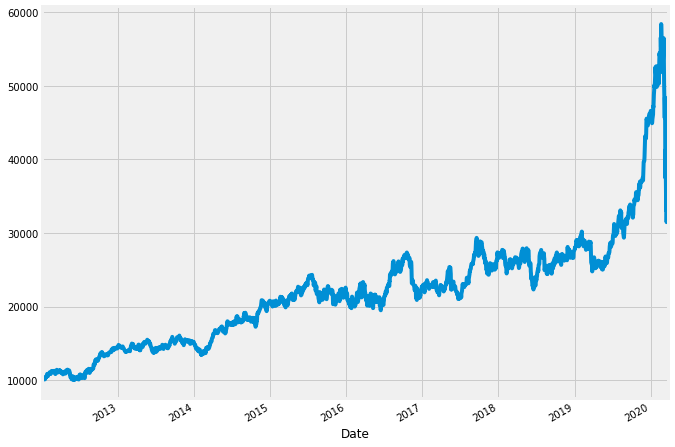

In [32]:
# Rentabilidade do portfolio
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
portf_val['Total Pos'].plot(figsize=(10,8))

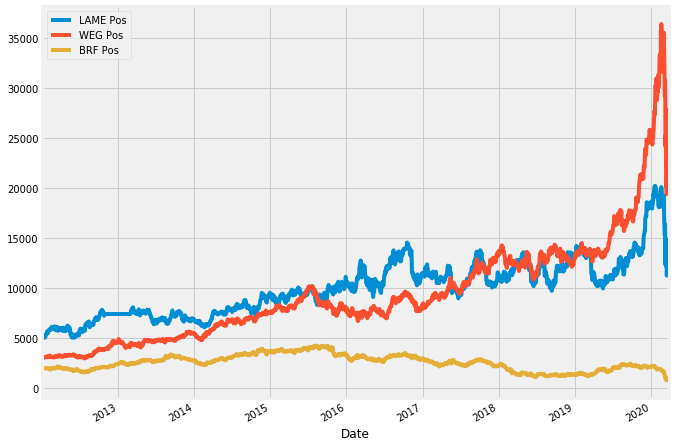

In [33]:
portf_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

In [34]:
cumulative_return = 100 * ( portf_val [ 'Total Pos' ] [-1 ] / portf_val ['Total Pos'][0]-1)
print('O seu retorno cumulativo foi {:.2f}% '.format(cumulative_return))

O seu retorno cumulativo foi 301.07% 


In [35]:
portf_val.tail(1)

,LAME Pos,WEG Pos,BRF Pos,Total Pos
Date,,,,
2020-03-27,13223.593724,25982.58281,900.678522,40106.855056


In [36]:
portf_val['Daily Return'] = portf_val['Total Pos'].pct_change(1)
Sharpe_Ratio = portf_val['Daily Return'].mean()/portf_val['Daily Return'].std()
Sharpe_Ratio

0.04899621403811302

In [37]:
A_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
A_Sharpe_Ratio

0.777790785171233

### Plotting Markowitz

In [38]:
stocks = prices.drop(columns = ['^BVSP'])
stocks.head()

,LAME4.SA,WEGE3.SA,BRFS3.SA
Date,,,
2012-01-02,7.184129,4.082735,33.019550
2012-01-03,7.213193,4.179007,33.418934
2012-01-04,7.198660,4.200883,33.688293
2012-01-05,7.203507,4.227145,33.883343
2012-01-06,7.193813,4.179007,33.985516


In [39]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,LAME4.SA,WEGE3.SA,BRFS3.SA
Date,,,
2012-01-02,NaN,NaN,NaN
2012-01-03,0.004037,0.023307,0.012023
2012-01-04,-0.002017,0.005221,0.008028
2012-01-05,0.000673,0.006232,0.005773
2012-01-06,-0.001347,-0.011453,0.003011


In [40]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [41]:
print('Maior Sharpe Ratio na matriz: {}'.format(sharpe_arr.max()))
print('Sua localização na matriz: {}'.format(sharpe_arr.argmax()))

print('\n', 'Os pesos de alocação são:')
print(all_weights[sharpe_arr.argmax(),:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

Maior Sharpe Ratio na matriz: 0.8556902339851923
Sua localização na matriz: 4333

 Os pesos de alocação são:
[0.0417643 0.9416387 0.016597 ]


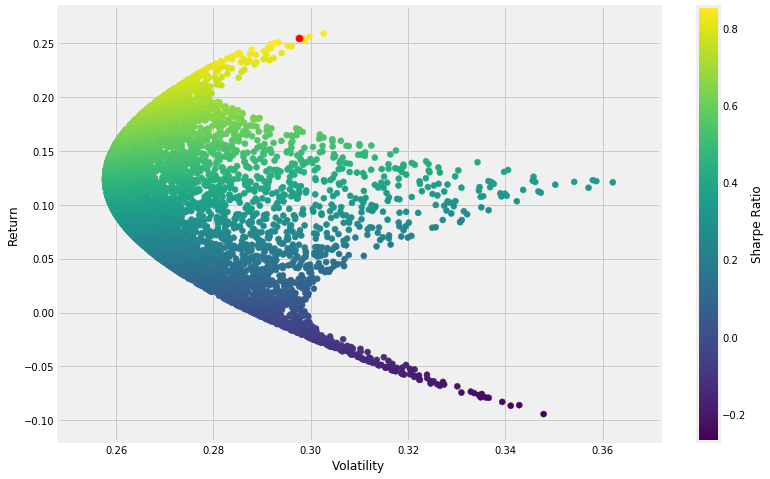

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [43]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

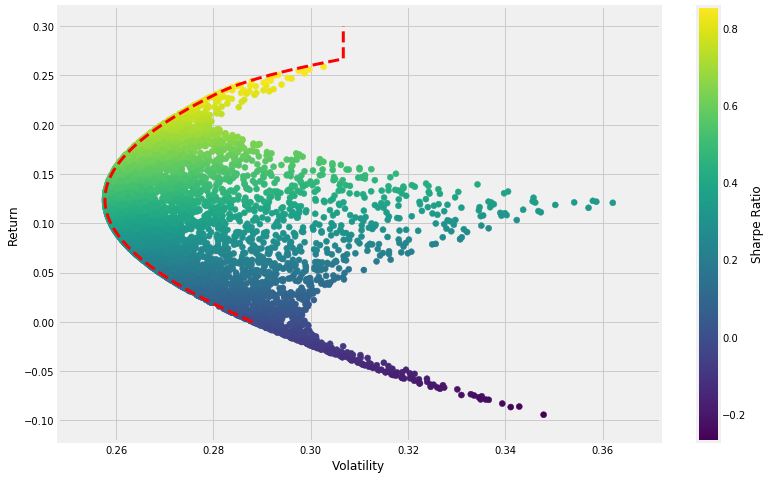

In [47]:
from scipy.optimize import minimize
init_guess = [0.5, 0.3, 0.2]
cons = ({'type':'eq', 'fun': check_sum})
bounds = ((0,1),(0,1),(0,1))
frontier_y = np.linspace(0,0.3,200)
frontier_x = []

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})

    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])
    
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

In [21]:
from scipy.optimize import minimize

cons = ({'type':'eq', 'fun': check_sum})
bounds = ((0,1),(0,1),(0,1))
init_guess = [0.5, 0.3, 0.2]

opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)
print(opt_results)

fun: -0.8610309599970413
     jac: array([3.36995721e-02, 7.45058060e-09, 6.65537797e-01])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([5.55111512e-17, 1.00000000e+00, 4.16333634e-17])


In [22]:
get_ret_vol_sr(opt_results.x)

array([0.26405687, 0.30667524, 0.86103096])

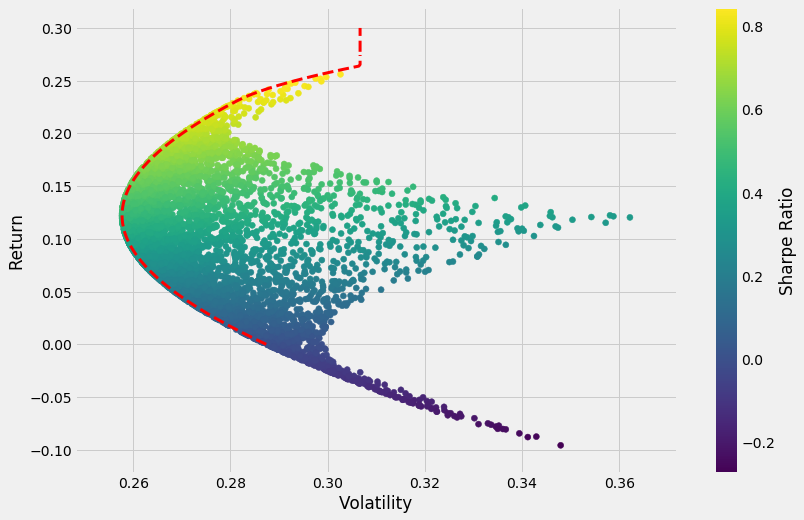